# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [80]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [81]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [82]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [83]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [84]:
# Your code here :
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), 
    data['MEDV'], 
    test_size=0.2, 
    random_state=42
)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [85]:
# Your code here:
from sklearn.linear_model import LinearRegression

# Get the model
model = LinearRegression()

# train the model
model.fit(X_train, y_train)

# predict with data where its trained on
y_train_pred = model.predict(X_train)
# predict with data it isnt trained on
y_test_pred = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [86]:
from sklearn.metrics import r2_score

# Calculate R-squared
# compare the true training data (y_train) with the model predictions on training data
r2_train = r2_score(y_train, y_train_pred)

# compare the true test data (y_test) with the model predictions on test data
r2_test = r2_score(y_test, y_test_pred)

# R-squared score (how well the model fits the data it was trained on)
print("R-squared (train):", r2_train)

# R-squared score (how well the model generalizes to unseen data)
print("R-squared (test):", r2_test)
# R-squared (train): 0.7508856358979672
# R-squared (test): 0.6687594935356289
#The model explains 75% of the variance on the training data and about 67% on the test data. 
#The small difference between train and test scores indicates no overfitting. Overall, the model generalizes well and performs solidly.

R-squared (train): 0.7508856358979672
R-squared (test): 0.6687594935356289


## 4. Calculate and print mean squared error for both the training and the testing set.

In [87]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) for training data
# MSE tells us the average squared difference between actual and predicted values; lower is better
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Mean Squared Error (MSE) for testing data
# This measures how well the model performs on unseen data
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the MSE values to evaluate model performance
print("Mean Squared Error (train):", mse_train)
print("Mean Squared Error (test):", mse_test)


Mean Squared Error (train): 21.641412753226316
Mean Squared Error (test): 24.29111947497374


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [88]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE) for training data
# MAE gives the average absolute difference between actual and predicted values; lower is better
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate Mean Absolute Error (MAE) for testing data
# This shows the average error size on unseen data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print MAE results to evaluate model performance
print("Mean Absolute Error (train):", mae_train)
print("Mean Absolute Error (test):", mae_test)


Mean Absolute Error (train): 3.314771626783233
Mean Absolute Error (test): 3.189091965887874


## Classification Model Evaluation

In [89]:
from sklearn.datasets import load_iris
data = load_iris()

In [90]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [91]:
column_names = data.feature_names

In [92]:
df = pd.DataFrame(data['data'],columns=column_names)

In [93]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [94]:
target = pd.DataFrame(data.target)


In [95]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [96]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [97]:

# Convert the features to a DataFrame for easier handling
X = pd.DataFrame(data['data'], columns=data['feature_names'])

# Convert the target to a DataFrame (classification labels: 0, 1, 2)
y = pd.DataFrame(data['target'], columns=['class'])

# Split the data into training (80%) and testing (20%) sets
# X contains the features (inputs), y contains the target labels (outputs)
# random_state ensures reproducibility (same split every time)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [98]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
# We use max_iter=200 to ensure convergence (sometimes needed for Iris dataset)
model = LogisticRegression(max_iter=200)

# Train (fit) the model on the training data
# The model learns the relationship between features and target classes
model.fit(X_train, y_train.values.ravel())

# Generate predictions on the training data
# This shows how well the model fits the data it has seen
y_train_pred = model.predict(X_train)

# Generate predictions on the testing data
# This shows how well the model generalizes to new unseen data
y_test_pred = model.predict(X_test)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [99]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score on training data
# Accuracy = percentage of correctly classified samples
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy scores to evaluate model performance
print("Accuracy (train):", train_accuracy)
print("Accuracy (test):", test_accuracy)


Accuracy (train): 0.975
Accuracy (test): 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [100]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy score on training data
# Balanced accuracy accounts for class imbalance by averaging recall across classes
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)

# Calculate balanced accuracy score on testing data
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

# Print balanced accuracy scores
print("Balanced Accuracy (train):", train_balanced_accuracy)
print("Balanced Accuracy (test):", test_balanced_accuracy)


Balanced Accuracy (train): 0.975609756097561
Balanced Accuracy (test): 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [101]:
from sklearn.metrics import precision_score

# Calculate precision score on training data
# Precision = true positives / (true positives + false positives)
# We use average='macro' to compute precision across all classes equally
train_precision = precision_score(y_train, y_train_pred, average='macro')

# Calculate precision score on testing data
test_precision = precision_score(y_test, y_test_pred, average='macro')

# Print precision scores
print("Precision (train):", train_precision)
print("Precision (test):", test_precision)


Precision (train): 0.9761904761904763
Precision (test): 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [102]:
from sklearn.metrics import recall_score

# Calculate recall score on training data
# Recall = true positives / (true positives + false negatives)
# We use average='macro' to compute recall across all classes equally
train_recall = recall_score(y_train, y_train_pred, average='macro')

# Calculate recall score on testing data
test_recall = recall_score(y_test, y_test_pred, average='macro')

# Print recall scores
print("Recall (train):", train_recall)
print("Recall (test):", test_recall)


Recall (train): 0.975609756097561
Recall (test): 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [103]:
from sklearn.metrics import f1_score

# Calculate F1 score on training data
# F1 score combines precision and recall into one metric (harmonic mean)
# We use average='macro' to compute F1 score across all classes equally
train_f1 = f1_score(y_train, y_train_pred, average='macro')

# Calculate F1 score on testing data
test_f1 = f1_score(y_test, y_test_pred, average='macro')

# Print F1 scores
print("F1 Score (train):", train_f1)
print("F1 Score (test):", test_f1)


F1 Score (train): 0.974996093139553
F1 Score (test): 1.0


## 13. Generate confusion matrices for both the training and the testing set.

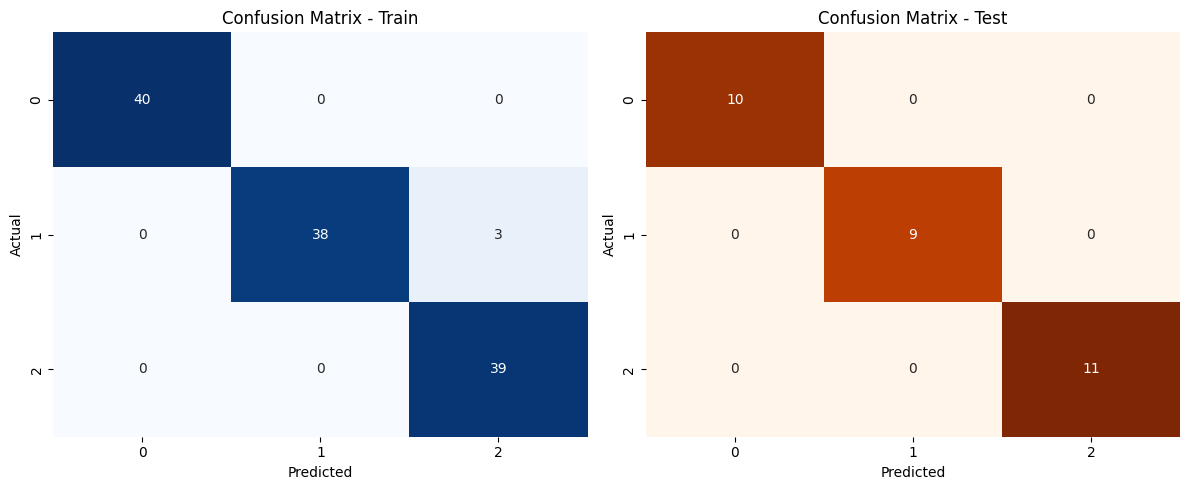

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot heatmaps
plt.figure(figsize=(12, 5))

# Training confusion matrix heatmap
plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Train")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Testing confusion matrix heatmap
plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix - Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

Model: Linear
MSE: 0.0
MAE: 0.0
R2: 1.0
--------
Model: DecisionTree
MSE: 0.0
MAE: 0.0
R2: 1.0
--------
Model: RandomForest
MSE: 0.0013833333333333336
MAE: 0.01366666666666667
R2: 0.9980206677265501
--------
Model: Logistic
Accuracy: 1.0
Balanced Accuracy: 1.0
F1 Score: 1.0
--------
Model: DecisionTree
Accuracy: 1.0
Balanced Accuracy: 1.0
F1 Score: 1.0
--------
Model: RandomForest
Accuracy: 1.0
Balanced Accuracy: 1.0
F1 Score: 1.0
--------
Model: SVM
Accuracy: 1.0
Balanced Accuracy: 1.0
F1 Score: 1.0
--------
